# Syed Muhammad Zain Computer Vision Deep Learning Model


## Importing libraries

In [3]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.utils import np_utils
from keras.optimizers import Adam
from tqdm import tqdm
import seaborn as sns
import numpy as np
import numpy as np
import pandas as pd
import os
from keras.layers import (Dropout, Input, Dense, Conv2D, 
                          MaxPooling2D, GlobalAveragePooling2D, 
                          UpSampling2D, Conv2DTranspose, 
                          Reshape, Flatten, Activation, 
                          BatchNormalization)
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import RandomNormal

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [5]:
Train_data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-train.csv', header=None)

In [6]:
Train_data1.shape

(112800, 785)

In [7]:
#splitting data into xtrain and ytrain
trainingy=Train_data1[[0]]
trainingx=Train_data1.drop([0],axis=1)
print(trainingy.shape)
print(trainingx.shape)

(112800, 1)
(112800, 784)


In [8]:
#converting to series
trainingy=Train_data1[0]
trainingy.shape

(112800,)

In [9]:
mapping=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
mapping.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [10]:
mappingdict = {}
for i,L in enumerate(mapping):
    mappingdict[i] = chr(L)

mappingdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [11]:
def correctingimage(imageforcorrection):
    imageforcorrection = imageforcorrection.reshape(28, 28)
    imageforcorrection = np.fliplr(imageforcorrection)
    imageforcorrection = np.rot90(imageforcorrection)
    return imageforcorrection

In [12]:
trainingx = np.apply_along_axis(correctingimage, 1, trainingx)
trainingx.shape

(112800, 28, 28)

In [13]:
#normalizing x and one hot encoding y both are not dataframes
def preprocess(x):    
    x = x.reshape(-1, 28, 28, 1) #-1 means number of examples are undefined/unknown
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

In [14]:
trainingx=preprocess(trainingx)

In [15]:
print(trainingx.max(),trainingx.min())

1.0 -1.0


In [16]:
gopt = Adam(0.0001, 0.5)
dopt = Adam(0.0002, 0.5)
ND = 100


## Training and testing

In [27]:
def Gena():

    convmodel = Sequential()

    convmodel.add(Dense(1048, input_dim=ND))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(Activation("relu"))
    
    convmodel.add(Dense(7350, input_dim=ND))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(Activation("relu"))
    
    convmodel.add(Reshape((7, 7, 150)))
    
    convmodel.add(UpSampling2D((2, 2)))
    convmodel.add(Conv2D(64, (2, 2), padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02)))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(LeakyReLU(0.2))
    convmodel.add(UpSampling2D((2, 2)))
   
    convmodel.add(Conv2D(1, (3, 3), padding='same', activation = "tanh", 
                     kernel_initializer=RandomNormal(0, 0.02)))
    
    return convmodel

In [28]:
def Disc():
    convmodel = Sequential()
    
    convmodel.add(Conv2D(64, (2, 2), strides=2, padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02), 
                     input_shape=(28, 28, 1)))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Conv2D(128, (2, 2), strides=2, 
                     kernel_initializer=RandomNormal(0, 0.02)))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Flatten())
    
    
    convmodel.add(Dense(1024))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Dropout(0.5))
    convmodel.add(Dense(1, activation='sigmoid'))
    
    convmodel.compile(loss='binary_crossentropy', optimizer=dopt)
    return convmodel

In [29]:
G = Gena()
G.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1048)              105848    
_________________________________________________________________
batch_normalization_3 (Batch (None, 1048)              4192      
_________________________________________________________________
activation_2 (Activation)    (None, 1048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 7350)              7710150   
_________________________________________________________________
batch_normalization_4 (Batch (None, 7350)              29400     
_________________________________________________________________
activation_3 (Activation)    (None, 7350)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 150)        

In [30]:
D= Disc()
D.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 64)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         32896     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              6423552   
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 1024)             

In [31]:
noisegenerated = Input(shape=(ND,))
fake_data_generated = G(noisegenerated )
D.trainable = False
OUTPUT1 = D(fake_data_generated)
DCGAN=Model(noisegenerated , OUTPUT1)
DCGAN.compile(loss='binary_crossentropy', optimizer=gopt)
 





In [32]:
FN= np.random.normal(0, 1, size=(30, ND))


In [33]:
def show_results(title, epoch):
    imgs = G.predict(FN)
    imgs = 0.5 * imgs + 0.5
    plt.figure(figsize=(11,11))
    
    i = 1
    for img in imgs:
        plt.subplot(10, 10, i)
        plt.imshow(img.reshape((28,28)), cmap='gray')
        plt.axis('off')
        i+=1
    plt.suptitle(title, fontsize = 15)
    plt.savefig(str(epoch)+".png", transparent=True)
    plt.show()

In [34]:
epochs = 51
batch_size = 256
steps_per_epoch = len(trainingx)//batch_size

current epouch is:  0
discriminator loss currently is :  0.6372194290161133
generator loss currently is:  0.9124824404716492
--------------------------------------------------------------------------------


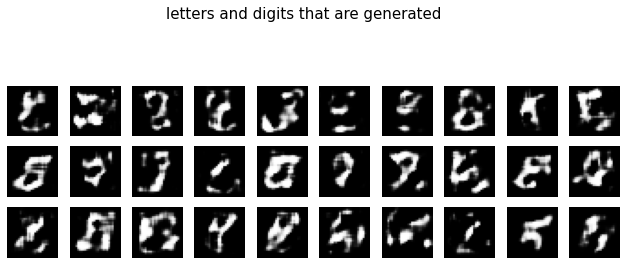

current epouch is:  1
discriminator loss currently is :  0.5855886936187744
generator loss currently is:  1.1374213695526123
--------------------------------------------------------------------------------
current epouch is:  2
discriminator loss currently is :  0.5861653089523315
generator loss currently is:  0.7745321989059448
--------------------------------------------------------------------------------
current epouch is:  3
discriminator loss currently is :  0.5727897882461548
generator loss currently is:  1.0754225254058838
--------------------------------------------------------------------------------
current epouch is:  4
discriminator loss currently is :  0.5730664134025574
generator loss currently is:  1.261592984199524
--------------------------------------------------------------------------------
current epouch is:  5
discriminator loss currently is :  0.6077473163604736
generator loss currently is:  1.7129719257354736
----------------------------------------------------

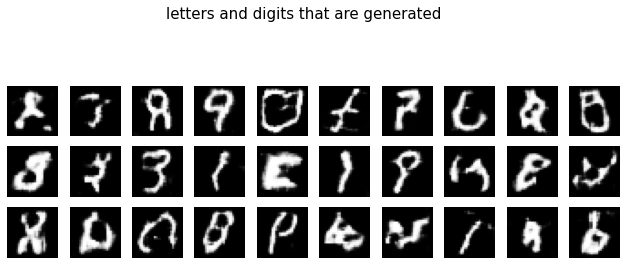

current epouch is:  6
discriminator loss currently is :  0.5878686904907227
generator loss currently is:  0.8557058572769165
--------------------------------------------------------------------------------
current epouch is:  7
discriminator loss currently is :  0.5470783710479736
generator loss currently is:  1.082917332649231
--------------------------------------------------------------------------------
current epouch is:  8
discriminator loss currently is :  0.5801408886909485
generator loss currently is:  1.2966504096984863
--------------------------------------------------------------------------------
current epouch is:  9
discriminator loss currently is :  0.5472053289413452
generator loss currently is:  1.0661592483520508
--------------------------------------------------------------------------------
current epouch is:  10
discriminator loss currently is :  0.5824374556541443
generator loss currently is:  1.4674031734466553
---------------------------------------------------

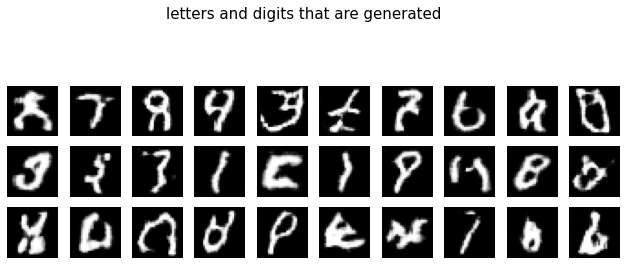

current epouch is:  11
discriminator loss currently is :  0.5857536792755127
generator loss currently is:  0.8804728984832764
--------------------------------------------------------------------------------
current epouch is:  12
discriminator loss currently is :  0.5433835387229919
generator loss currently is:  1.0264849662780762
--------------------------------------------------------------------------------
current epouch is:  13
discriminator loss currently is :  0.648563802242279
generator loss currently is:  0.7001293301582336
--------------------------------------------------------------------------------
current epouch is:  14
discriminator loss currently is :  0.5790671110153198
generator loss currently is:  1.3667900562286377
--------------------------------------------------------------------------------
current epouch is:  15
discriminator loss currently is :  0.5514001846313477
generator loss currently is:  1.095380425453186
------------------------------------------------

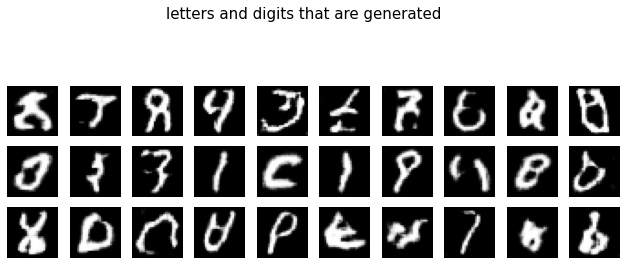

current epouch is:  16
discriminator loss currently is :  0.5664494037628174
generator loss currently is:  1.330469012260437
--------------------------------------------------------------------------------
current epouch is:  17
discriminator loss currently is :  0.5655434727668762
generator loss currently is:  1.1722989082336426
--------------------------------------------------------------------------------
current epouch is:  18
discriminator loss currently is :  0.5538744926452637
generator loss currently is:  0.9412897229194641
--------------------------------------------------------------------------------
current epouch is:  19
discriminator loss currently is :  0.5763503313064575
generator loss currently is:  0.7932795882225037
--------------------------------------------------------------------------------
current epouch is:  20
discriminator loss currently is :  0.5687474608421326
generator loss currently is:  1.253892183303833
------------------------------------------------

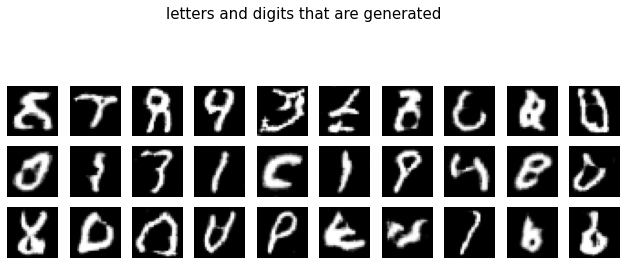

current epouch is:  21
discriminator loss currently is :  0.5371190905570984
generator loss currently is:  1.0642681121826172
--------------------------------------------------------------------------------
current epouch is:  22
discriminator loss currently is :  0.557697057723999
generator loss currently is:  1.1855813264846802
--------------------------------------------------------------------------------
current epouch is:  23
discriminator loss currently is :  0.5650814175605774
generator loss currently is:  0.9973055124282837
--------------------------------------------------------------------------------
current epouch is:  24
discriminator loss currently is :  0.5630003213882446
generator loss currently is:  1.3534364700317383
--------------------------------------------------------------------------------
current epouch is:  25
discriminator loss currently is :  0.5570594072341919
generator loss currently is:  1.1839520931243896
-----------------------------------------------

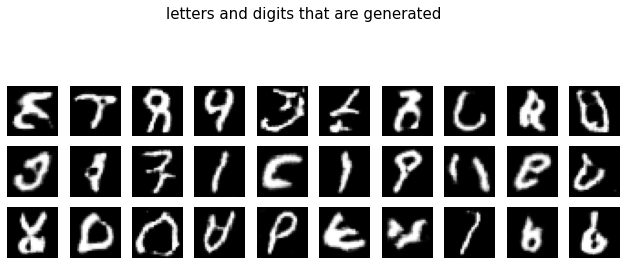

current epouch is:  26
discriminator loss currently is :  0.5463130474090576
generator loss currently is:  1.0980451107025146
--------------------------------------------------------------------------------
current epouch is:  27
discriminator loss currently is :  0.5488468408584595
generator loss currently is:  1.0308952331542969
--------------------------------------------------------------------------------
current epouch is:  28
discriminator loss currently is :  0.5565226078033447
generator loss currently is:  1.1307793855667114
--------------------------------------------------------------------------------
current epouch is:  29
discriminator loss currently is :  0.5620349049568176
generator loss currently is:  0.9431496858596802
--------------------------------------------------------------------------------
current epouch is:  30
discriminator loss currently is :  0.5562491416931152
generator loss currently is:  0.9675890207290649
----------------------------------------------

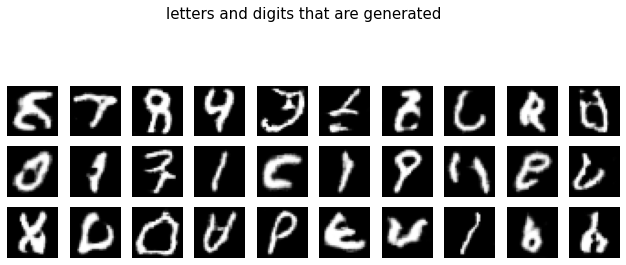

current epouch is:  31
discriminator loss currently is :  0.5852476358413696
generator loss currently is:  1.5735546350479126
--------------------------------------------------------------------------------
current epouch is:  32
discriminator loss currently is :  0.5437971353530884
generator loss currently is:  1.0039050579071045
--------------------------------------------------------------------------------
current epouch is:  33
discriminator loss currently is :  0.5173977017402649
generator loss currently is:  1.2691329717636108
--------------------------------------------------------------------------------
current epouch is:  34
discriminator loss currently is :  0.5483311414718628
generator loss currently is:  1.0135252475738525
--------------------------------------------------------------------------------
current epouch is:  35
discriminator loss currently is :  0.5401004552841187
generator loss currently is:  0.8590773344039917
----------------------------------------------

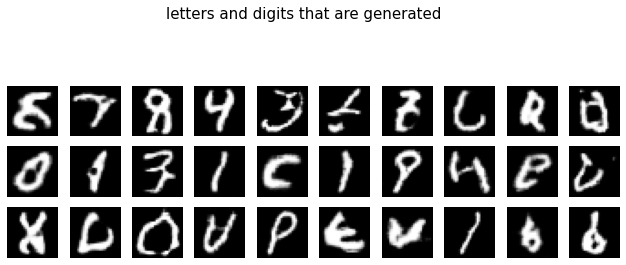

current epouch is:  36
discriminator loss currently is :  0.5608750581741333
generator loss currently is:  1.2349424362182617
--------------------------------------------------------------------------------
current epouch is:  37
discriminator loss currently is :  0.5743764638900757
generator loss currently is:  0.9099642038345337
--------------------------------------------------------------------------------
current epouch is:  38
discriminator loss currently is :  0.5407166481018066
generator loss currently is:  1.2144365310668945
--------------------------------------------------------------------------------
current epouch is:  39
discriminator loss currently is :  0.5466791391372681
generator loss currently is:  1.3835277557373047
--------------------------------------------------------------------------------
current epouch is:  40
discriminator loss currently is :  0.5409706830978394
generator loss currently is:  1.1588414907455444
----------------------------------------------

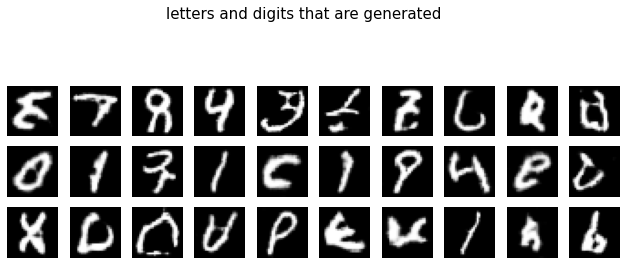

current epouch is:  41
discriminator loss currently is :  0.5392460823059082
generator loss currently is:  1.023206353187561
--------------------------------------------------------------------------------
current epouch is:  42
discriminator loss currently is :  0.5329334735870361
generator loss currently is:  1.360100507736206
--------------------------------------------------------------------------------
current epouch is:  43
discriminator loss currently is :  0.5168915390968323
generator loss currently is:  1.4217312335968018
--------------------------------------------------------------------------------
current epouch is:  44
discriminator loss currently is :  0.506773054599762
generator loss currently is:  1.0716694593429565
--------------------------------------------------------------------------------
current epouch is:  45
discriminator loss currently is :  0.5855793952941895
generator loss currently is:  0.86241614818573
---------------------------------------------------

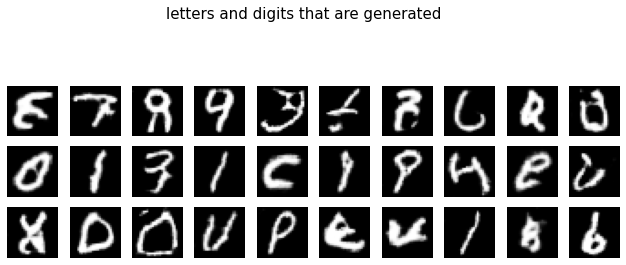

current epouch is:  46
discriminator loss currently is :  0.538446307182312
generator loss currently is:  1.390318751335144
--------------------------------------------------------------------------------
current epouch is:  47
discriminator loss currently is :  0.5255668759346008
generator loss currently is:  1.1314467191696167
--------------------------------------------------------------------------------
current epouch is:  48
discriminator loss currently is :  0.5205274224281311
generator loss currently is:  1.0490750074386597
--------------------------------------------------------------------------------
current epouch is:  49
discriminator loss currently is :  0.5867781043052673
generator loss currently is:  1.6762850284576416
--------------------------------------------------------------------------------
current epouch is:  50
discriminator loss currently is :  0.5912593603134155
generator loss currently is:  0.7377029061317444
------------------------------------------------

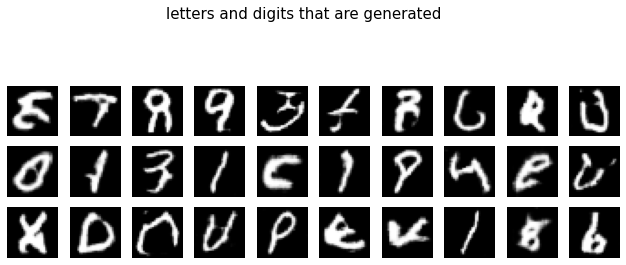

In [35]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        inputgenerator = np.random.normal(0, 1, size=(batch_size, ND))
        fakedataG = G.predict(inputgenerator)
        realdataG = trainingx[np.random.randint(0, trainingx.shape[0], size=batch_size)]
        realdataG = realdataG.reshape((batch_size, 28, 28, 1))
        inputdiscriminator= np.concatenate((realdataG , fakedataG))
        labeldiscriminator = np.zeros(2*batch_size)
        labeldiscriminator[:batch_size] = 0.9
        labeldiscriminator[batch_size:] = 0.1
        lossdiscriminator= D.train_on_batch(inputdiscriminator, labeldiscriminator)
        labelgenerator= np.ones(batch_size)
        lossgenerator = DCGAN.train_on_batch(inputgenerator, labelgenerator)

    print("current epouch is: ", epoch)
    print("discriminator loss currently is : ", lossdiscriminator)
    print("generator loss currently is: ", lossgenerator)
    print("-"*80)
    
    if epoch % 5 == 0:
        show_results("letters and digits that are generated", epoch)